In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Its purpose is:
# → Whenever you create a graph with matplotlib, the graph will be shown directly below the code cell in the notebook.
# Without this, sometimes the graph won’t appear unless you use plt.show().
%matplotlib inline  
import seaborn as sns

In [2]:
# we use this (encoding="unicode_escape") to avoid encoding error, use "unicode_escape"
#If a file is saved in one format (say UTF-8) but your program tries to read it in another (say ASCII), it can’t understand some characters → this causes an encoding error.
df=pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")  #df=dataframe

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


#data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(["Status","unnamed1"],axis=1,inplace=True) #(axis=0 → delete row(s) axis=1 → delete column(s).) with drop
#inplace=True   
#-->By default, Pandas functions (like drop, fillna, rename, etc.) create a new DataFrame and leave the original unchanged.
#-->If you add inplace=True, the operation is applied directly to the original DataFrame (no copy is made).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
#Check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#Delete null values
df.dropna(inplace=True)

In [10]:
df.shape

(11239, 13)

In [11]:
#again check ull values
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

Both are same thing 

df.dropna(inplace=True)  #but this is better way to clean data 

a=df.dropna()


In [12]:
#change data type
df["Amount"]=df["Amount"].astype("int")

In [13]:
#to check datatype
df["Amount"].dtypes

dtype('int64')

In [14]:
# to see the columns name that are available in the dataframe  we use .columns method
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
#rename column name
df.rename(columns={"Occupation":"Profession"},inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Profession,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [16]:
#describe() method returns description of the data in the datafarame(i.e., count,mean,median,std,etc.)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
#use describe() for specific columns
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


***EDA (Exploratory Data Analysis)***


Gender


In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Profession', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

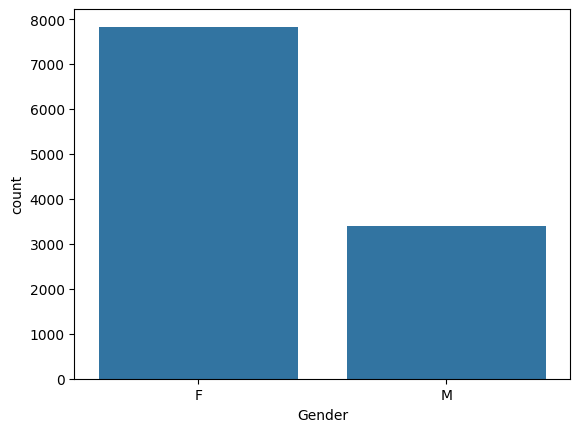

In [19]:
ax=sns.countplot(x="Gender",data=df)

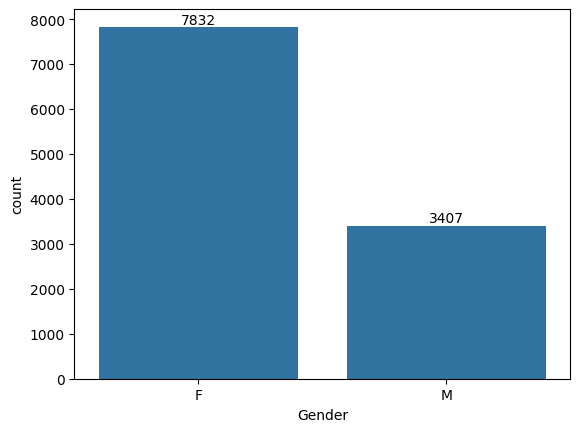

In [20]:
ax=sns.countplot(x="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
#Split data → Apply Calculations(like mean,median,mode,std,etc.) → Combine
df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


**df.groupby(["Gender"], as_index=False)**
→ Splits the dataset into groups based on Gender.
→ as_index=False ensures Gender remains a column, not the index.

**["Amount"].sum()**
→ From each Gender group, take the "Amount" column and calculate the sum.

**.sort_values(by="Amount", ascending=False)**
→ Finally, sort the result by the Amount column, in descending order (largest first)*

<Axes: xlabel='Gender', ylabel='Amount'>

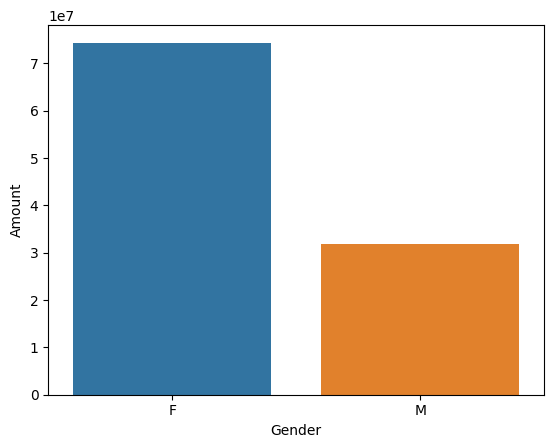

In [22]:
sales_by_gender=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x = "Gender",y = "Amount", data = sales_by_gender,hue="Gender")

**Insight 1**

*From the above graph we can see that most of the buyers are female and even the purchasing power of females greater than men*

Age

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Profession', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

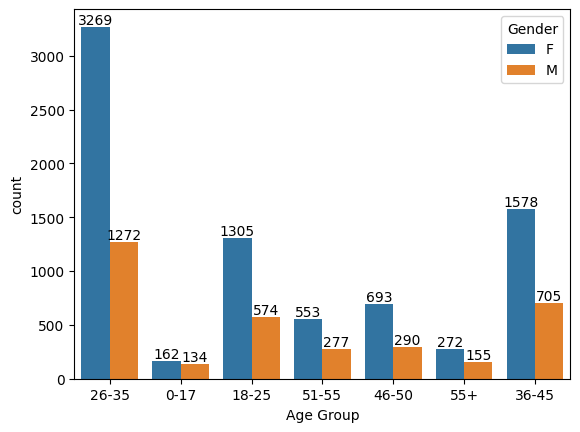

In [24]:
ax=sns.countplot(x="Age Group",data=df,hue = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
#Total Amount VS Age Group
sales_by_Age_Group=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sales_by_Age_Group

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

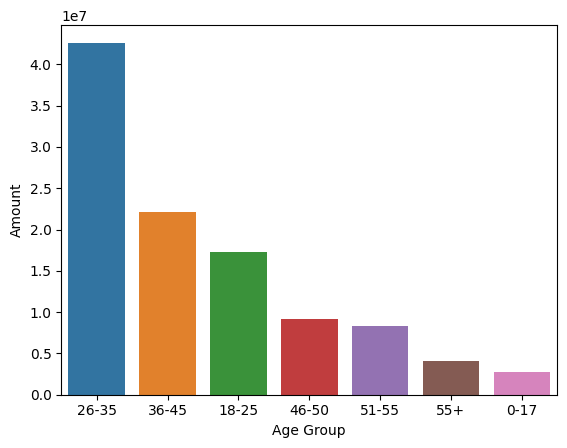

In [26]:
sns.barplot(x = "Age Group",y = "Amount",data=sales_by_Age_Group,hue="Age Group")

**Insight 2**

From the above graphs we can see that most of the buyers are of age group between 26-35 years female

State

In [27]:
#total orders of top 10 states
Total_sales_by_State=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values("Orders",ascending=False).head(10)
Total_sales_by_State

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

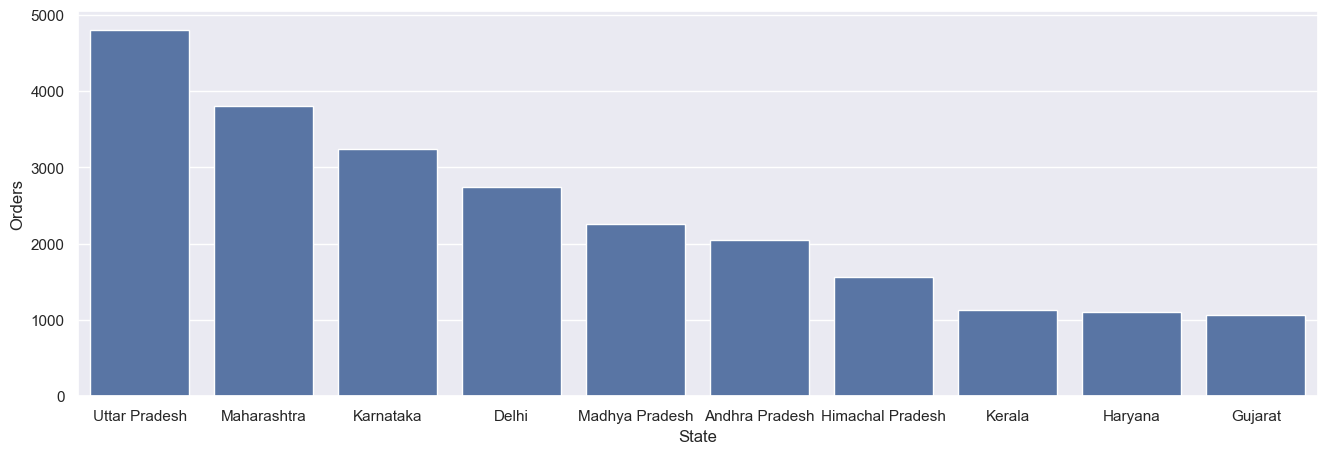

In [28]:
sns.set(rc={"figure.figsize":(16,5)})  #to give the size of graph in seaborn
sns.barplot(x="State",y="Orders",data=Total_sales_by_State)


In [29]:
#total sales amount of top 10 states
Total_sales_Amount=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
Total_sales_Amount

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

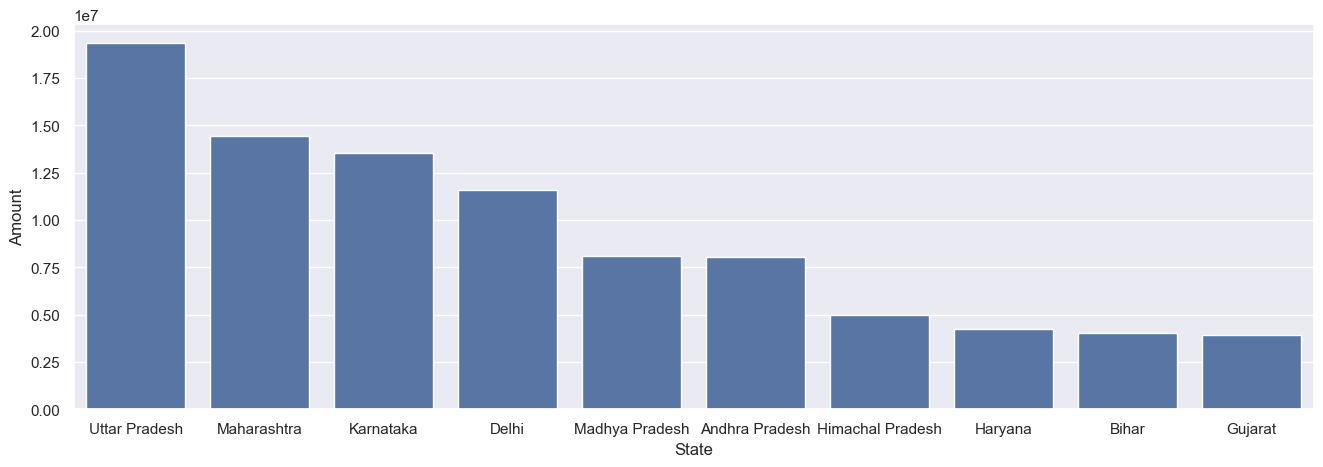

In [30]:
#total sales amount vs State
sns.set(rc=({"figure.figsize":(16,5)}))
sns.barplot(x="State",y="Amount",data=Total_sales_Amount)

**Insight 3**

From the above graphs we can see that unexcpectedly most of the orders are from Uttar Pradesh, Maharastra and Karnataka respectively.

Marital Status

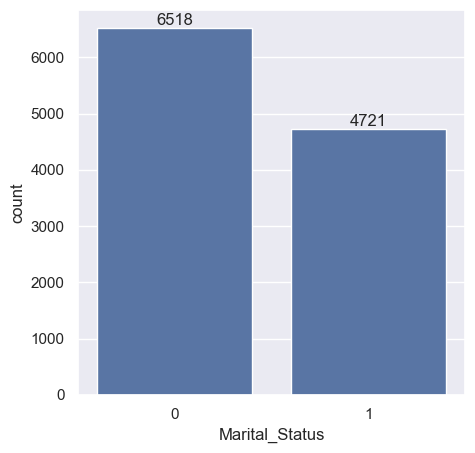

In [31]:
# count of marital status
sns.set(rc=({"figure.figsize":(5,5)}))
ax=sns.countplot(x="Marital_Status",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
Marital_status_by_Amount=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
Marital_status_by_Amount

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


Here 0 for Married and 1 for Unmarried

<Axes: xlabel='Marital_Status', ylabel='Amount'>

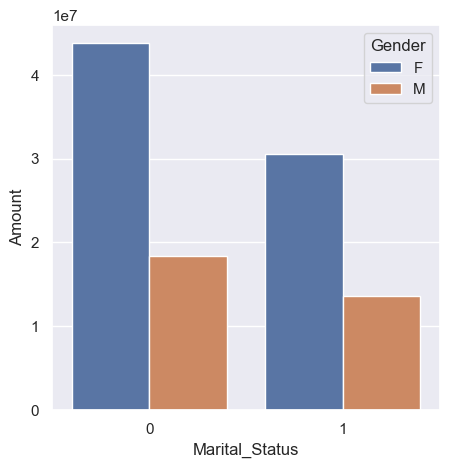

In [33]:
sns.barplot(x="Marital_Status",y="Amount",data=Marital_status_by_Amount,hue="Gender")

here 1e7 refers to it 

1x10^7,2x10^7...... nx10^7   

**Insight 4**

From the above graphs we can see that most of the buyers are married (women) and they have high purchasing power

##Profession

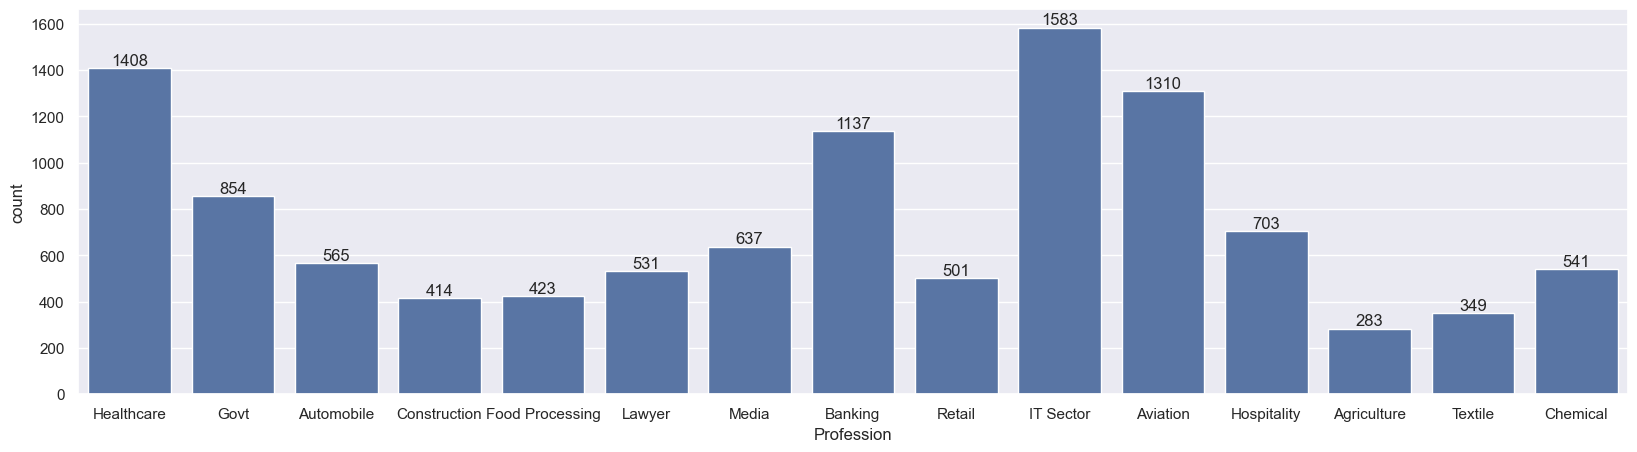

In [34]:
sns.set(rc=({"figure.figsize":(20,5)}))
ax=sns.countplot(x="Profession",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [35]:
#Amount by Profession
Amount_by_Profession=df.groupby(["Profession"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
Amount_by_Profession

,Profession,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Profession', ylabel='Amount'>

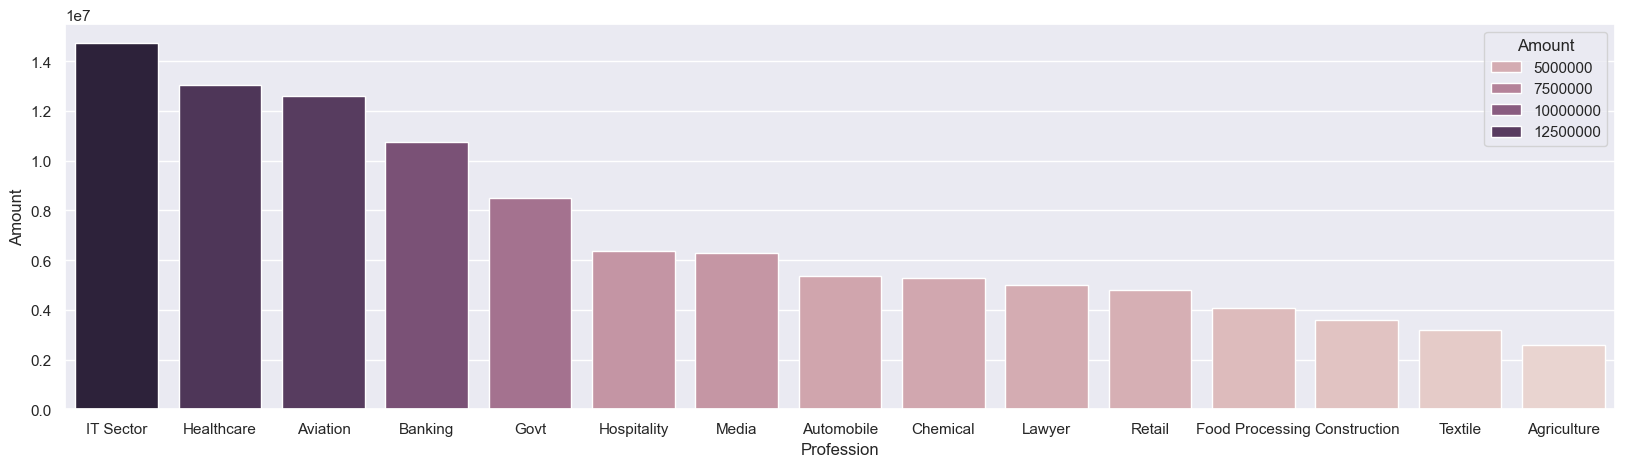

In [36]:
sns.barplot(x = "Profession",y = "Amount",data = Amount_by_Profession , hue = "Amount")

**Insight 5**

From the above graphs we can see that the most of the buyers are working in IT, Healthcare and Aviation.

##Product Category

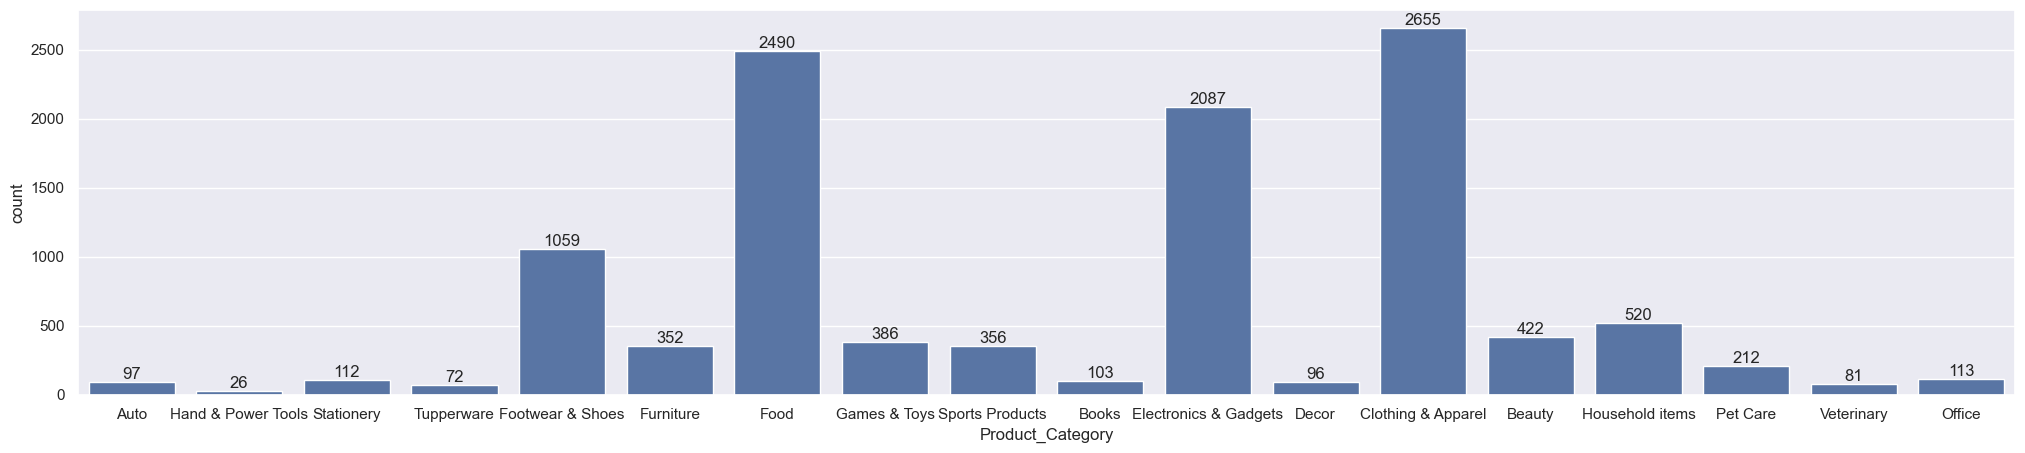

In [37]:
sns.set(rc=({"figure.figsize":(25,5)}))
ax=sns.countplot(x="Product_Category",data=df) #here countplot count the number of a values is repeated/ordered in a original dataset
for bars in ax.containers:
    ax.bar_label(bars)

In [38]:
#Product Category by Amount
Product_category_by_Amount=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False).head(10)
Product_category_by_Amount

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

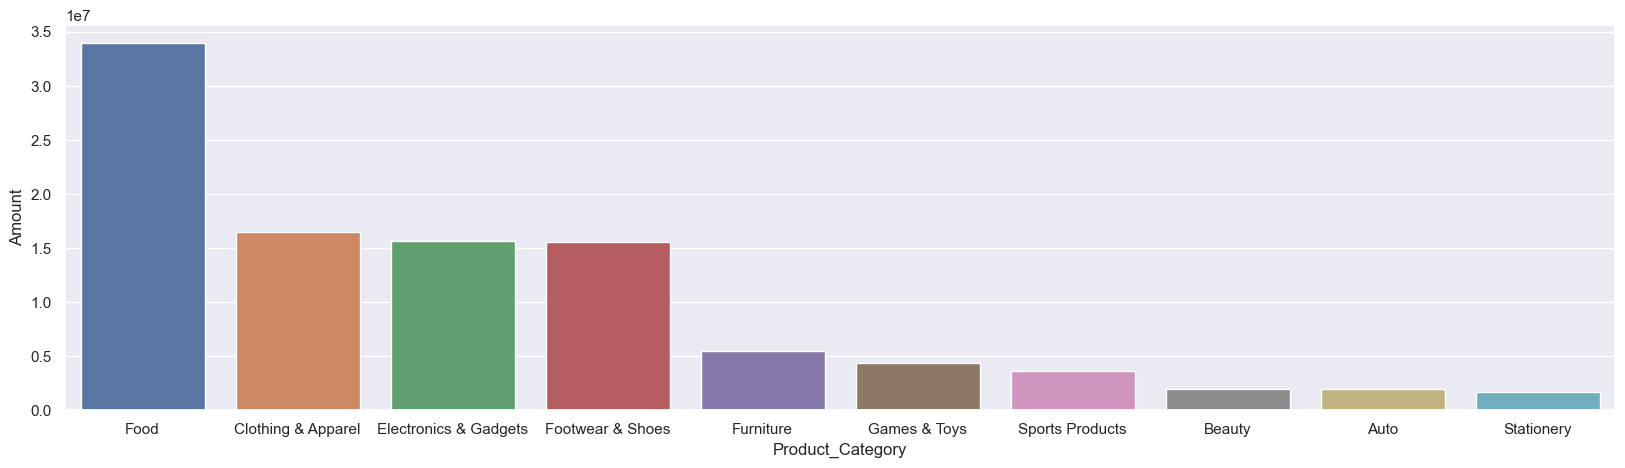

In [39]:
sns.set(rc=({"figure.figsize":(20,5)}))
sns.barplot(x="Product_Category",y="Amount",data=Product_category_by_Amount,hue="Product_Category")

**Insight 6**

From the above graphs we can see thatthe most of the sold products are from Food, Footwear and Electronics Category.

In [43]:
Total_orders_by_Product_ID=df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
Total_orders_by_Product_ID

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
171,P00025442,79
679,P00114942,79
888,P00145042,76
708,P00117942,76
298,P00044442,75
643,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

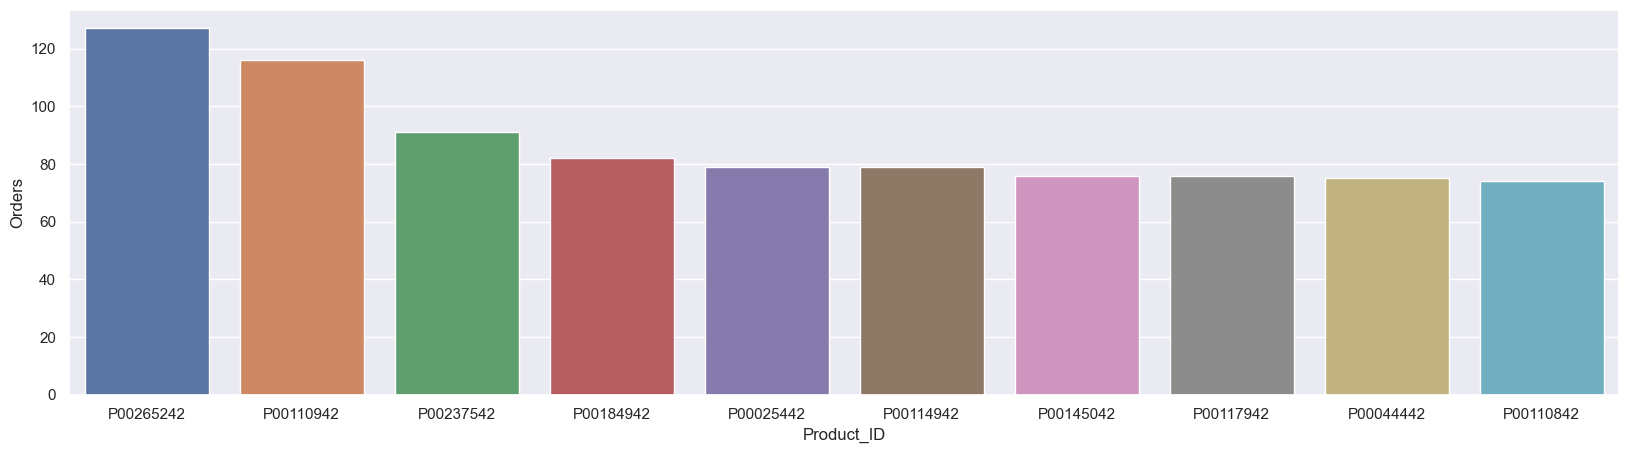

In [44]:
sns.barplot(x="Product_ID",y="Orders",data=Total_orders_by_Product_ID,hue="Product_ID")

**Conclusion:-**

Married Women Age group 26-35 yrs from UP,Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from food, Clothing and Electronics Category.